In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

# Exercises 1

## 1.

Combinations of two dice that add to a given number:

In [21]:
die = np.arange(1, 7)
dice = np.tile(die, (6, 1))
dice = pd.DataFrame(dice + dice.transpose(), columns=die, index=die)
dice

,1,2,3,4,5,6
1,2,3,4,5,6,7
2,3,4,5,6,7,8
3,4,5,6,7,8,9
4,5,6,7,8,9,10
5,6,7,8,9,10,11
6,7,8,9,10,11,12


In [22]:
n_10 = (dice == 10).values.sum()
n_10

3

In [23]:
n_11 = (dice == 11).values.sum()
n_11

2

### a)

Prior probability of craps and roulette:

In [24]:
prior = np.array([1, 2])
prior = prior / prior.sum()
prior

array([0.33333333, 0.66666667])

Likelihood for craps and roulette:

In [25]:
likelihood = np.array([n_11/36, 1/38])
likelihood

array([0.05555556, 0.02631579])

Posterior probability for craps and roulette:

In [26]:
posterior = prior * likelihood
posterior = posterior / posterior.sum()
posterior

array([0.51351351, 0.48648649])

In [27]:
posterior[0].round(2)

0.51

### b)

Prior probability of craps and roulette:

In [28]:
prior = np.array([2, 1])
prior = prior / prior.sum()
prior

array([0.66666667, 0.33333333])

Likelihood for craps and roulette:

In [29]:
likelihood = np.array([n_10/36, 1/38])
likelihood

array([0.08333333, 0.02631579])

Posterior probability for craps and roulette:

In [30]:
posterior = prior * likelihood
posterior = posterior / posterior.sum()
posterior

array([0.86363636, 0.13636364])

In [31]:
posterior[1].round(2)

0.14

## 2.

Assuming you pick door 1 and the host opens door 3, the prior probabilities are following:

In [32]:
prior = np.ones(3) / 3
prior

array([0.33333333, 0.33333333, 0.33333333])

Likelihood counts the ways the car can have ended up behind doors 1 and 2 given that door 3 has a goat.

In [33]:
likelihood = np.array([1, 2, 0])

Probabilities for each door are:

In [34]:
posterior = prior * likelihood
posterior = posterior / posterior.sum()
posterior.round(2)

array([0.33, 0.67, 0.  ])

Door 2 has higher posterior probability, so the contestant should always switch. This can be explained by the fact that the
host always gives the contestant new and reliable information on the game setup. The contestant should update their beliefs
because they always have more information when choosing between the doors after the goat reveal than before it.

## 3.

In [35]:
fruits = pd.DataFrame(
    [[3, 4, 3],
    [1, 1, 0],
    [3, 3, 4]],
    columns=['apples', 'oranges', 'limes'],
    index=['r', 'b', 'g'],
)
p_box = pd.Series(dict(r=0.2, b=0.2, g=0.6))
fruits_p = fruits / fruits.values.sum(axis=1, keepdims=True)
fruits_p

,apples,oranges,limes
r,0.3,0.4,0.3
b,0.5,0.5,0.0
g,0.3,0.3,0.4


### a)

In [36]:
combined_p = fruits_p * np.tile(p_box.values[..., np.newaxis], (1, 3))
combined_p.apples.sum().round(2)

0.34

Probability of an apple is 1/3.

### b)

In [37]:
prior = p_box.values
likelihood = fruits_p.oranges.values
posterior = prior * likelihood
posterior = posterior / posterior.sum()
posterior[1].round(2)

0.28

P(g|apple) = 0.28

## 4.

Log prob (Exponential, 10): [-179.72829628 -177.36380748 -181.21075245 -179.09689191 -179.10188611
 -179.31664852 -180.63619142 -178.75823164 -178.84290862 -180.59429028]
Log prob (Exponential, 20): [-361.38768003 -355.84557551 -351.1952306  -359.75477232 -354.89120611
 -359.23424227 -356.60495173 -360.42650309 -357.05823732 -355.45014724
 -361.06773538 -364.21198581 -359.46874669 -359.16195388 -361.18476978
 -361.14689332 -359.98271008 -359.16511168 -359.32410596 -360.34117463]
Log prob (Exponential, 100): [-1792.01635771 -1795.02071825 -1804.64256169 -1814.51987421
 -1777.10175611 -1776.2994927  -1800.17401025 -1796.23688418
 -1809.75574491 -1781.82306687 -1782.796502   -1797.7201053
 -1805.52910168 -1781.52421841 -1785.03070492 -1797.51366983
 -1806.36238731 -1775.76781099 -1793.0658722  -1795.75258086
 -1779.43479906 -1783.07304462 -1810.03568481 -1821.47443732
 -1793.26418752 -1787.79064341 -1809.6330061  -1772.55919994
 -1819.44081006 -1819.03816546 -1774.55759632 -1790.65658715


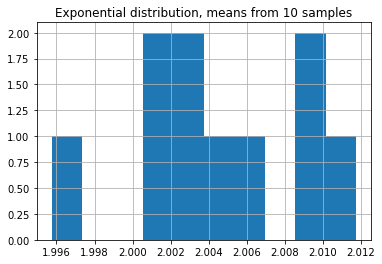

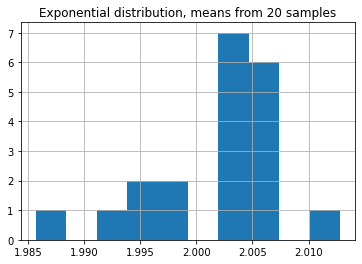

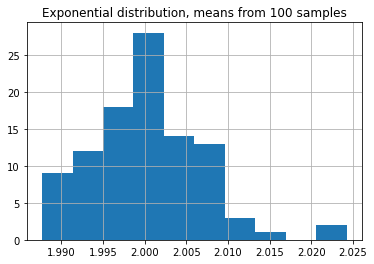

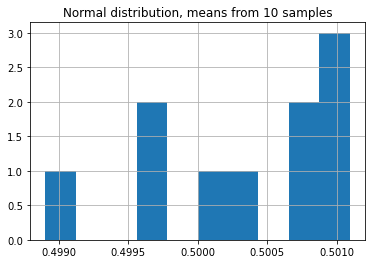

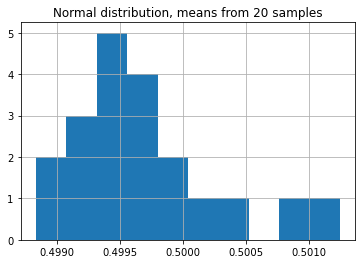

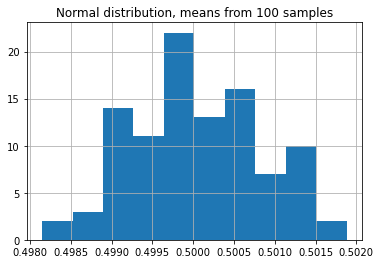

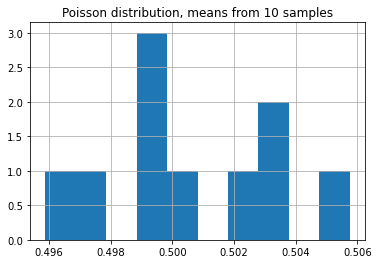

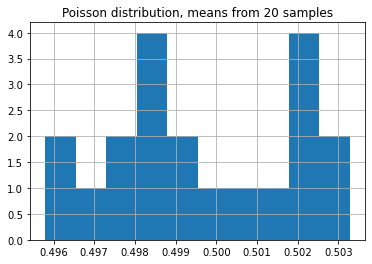

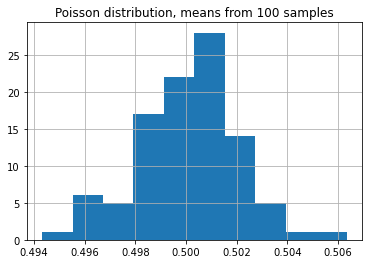

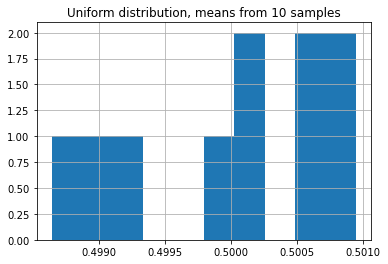

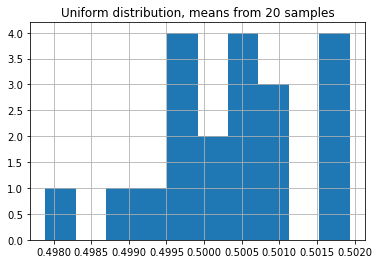

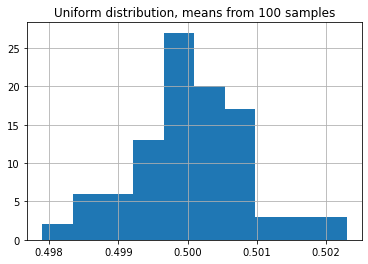

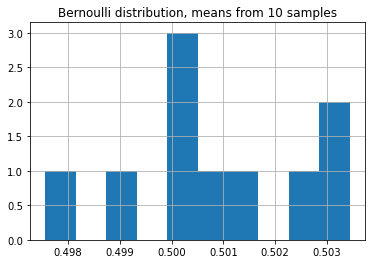

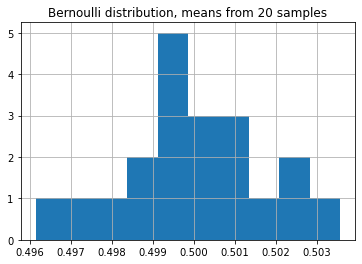

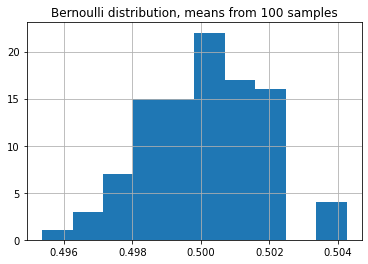

In [38]:
mu = 0.5
sigma = 0.25

distributions = {
    'exponential': tfd.Exponential(np.repeat(mu, repeats=100_000)),
    'normal': tfd.Normal(np.repeat(mu, repeats=100_000), scale=np.repeat(sigma, repeats=100_000)),
    'poisson': tfd.Poisson(np.repeat(mu, repeats=100_000)),
    'uniform': tfd.Uniform(np.repeat(0., repeats=100_000), np.repeat(1., repeats=100_000)),
    'bernoulli': tfd.Bernoulli(probs=np.repeat(mu, repeats=100_000)),
}

for name, dist in distributions.items():
    for n in 10, 20, 100:
        sample = dist.sample(n).numpy()
        means = pd.Series(sample.mean(axis=1))

        log_prob = tfd.Normal(mu, np.sqrt(sigma**2 / n)).log_prob(means).numpy()
        print(f"Log prob ({name.capitalize()}, {n}): {log_prob}")

        fig = means.hist()
        fig.set_title(f'{name.capitalize()} distribution, means from {n} samples')
        plt.show()

## 5.

My research problem would be this: Is there association between the spatial segregation of populations and wealth?
I would like inspect the connection between ethnicity and wealth by taking into account spatial clusters of ethnic
 groups and high income.

The generative process might work like this:
* certain ethnic groups are more likely to be wealthy
* wealthy people tend to live in better parts of the town
* therefore, income segregation causes spatial segregation
* however, there are other processes that may cause the spatial segregation of ethnic groups

My ultimate aim is to test empirically whether income differences explain all of the ethnic segregation.

Latent variables that might be needed for modelling:
* the other, hidden variables that affect segregation